<a href="https://colab.research.google.com/github/AhmadIsmail83N/MyData/blob/master/DZ_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим все необходимые библиотеки:

In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Настроим отображение графиков



In [0]:
# Enable inline plots
%matplotlib inline
# Set plot style
sns.set(style="ticks")
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [0]:
pd.set_option("display.width", 70)

**2.2.1. Предварительная подготовка данных**

In [0]:
data = pd.read_csv("/content/sample_data/MapData-Evans-GP.csv", skiprows=range(1, 45000))

In [7]:
data.dtypes

Latitude °               int64
Latitude                object
Longitude °              int64
Longitude               object
Topography              object
Difficulty Challenge     int64
Altitude                 int64
Temperature              int64
Metals                   int64
Rare Metals              int64
Concrete                 int64
Water                    int64
Dust Devils              int64
Dust Storms              int64
Meteors                  int64
Cold Waves               int64
Map Name                object
Named Location          object
Breakthrough 1          object
Breakthrough 2          object
Breakthrough 3          object
Breakthrough 4          object
Breakthrough 5          object
Breakthrough 6          object
Breakthrough 7          object
Breakthrough 8          object
Breakthrough 9          object
Breakthrough 10         object
Breakthrough 11         object
Breakthrough 12         object
Breakthrough 13         object
Breakthrough 14         object
Breakthr

Посмотрим на данные в данном наборе данных:

In [8]:
data.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17
0,62,N,149,E,Relatively Flat,140,-3930,-86,2,2,3,1,1,2,1,4,BlankBigCliffsCMix_02,Arcadia Planitia,Dry Farming,Superconducting Computing,Plutonium Synthesis,Advanced Drone Drive,Neural Empathy,Core Metals,Zero-Space Computing,Overcharge Amplifications,Cryo-sleep,Vocation-Oriented Society,Wireless Power,Autonomous Hubs,Magnetic Extraction,Safe Mode,Extractor AI,Superior Cables,Construction Nanites
1,62,N,149,W,Relatively Flat,140,-3584,-86,1,1,1,1,1,2,1,4,BlankBigTerraceCMix_17,NaN,Soylent Green,Printed Electronics,Eternal Fusion,Inspiring Architecture,Dome Streamlining,Safe Mode,Hive Mind,Autonomous Hubs,Advanced Drone Drive,Landscaping Nanites,Extractor AI,Superconducting Computing,Factory Automation,Plasma Rocket,Construction Nanites,Martianborn Ingenuity,Martian Diet
2,62,S,150,E,Relatively Flat,100,1956,-15,2,2,2,2,2,1,3,1,BlankBig_04,NaN,Neural Empathy,Wireless Power,Artificial Muscles,Superior Pipes,Dry Farming,Safe Mode,Printed Electronics,Sustained Workload,Superfungus,Zero-Space Computing,Core Water,Eternal Fusion,Factory Automation,Landscaping Nanites,Alien Imprints,Resilient Vegetation,Hive Mind
3,62,S,150,W,Relatively Flat,100,-6,-29,2,2,1,2,2,2,2,2,BlankBig_03,Terra Sireum,Martian Diet,Artificial Muscles,Cryo-sleep,Magnetic Extraction,Nocturnal Adaptation,Gem Architecture,Ancient Terraforming Device,Autonomous Hubs,Space Rehabilitation,Core Water,Core Metals,Neo-Concrete,Dry Farming,Superior Pipes,Giant Crops,Sustained Workload,Resilient Vegetation
4,62,N,150,E,Relatively Flat,140,-4045,-86,2,2,3,1,1,2,1,4,BlankBigTerraceCMix_03,Arcadia Planitia,Zero-Space Computing,Ancient Terraforming Device,Martianborn Ingenuity,Nocturnal Adaptation,Factory Automation,Inspiring Architecture,Martian Steel,The Positronic Brain,Hull Polarization,Dry Farming,Cryo-sleep,Artificial Muscles,Neo-Concrete,Superior Pipes,Overcharge Amplifications,Core Metals,Gene Selection


Convert Temperature (° F)   to Temperature (C)  

In [0]:
def TempreatureCToF(t):
  return t*9/5 +32

In [10]:
df = data.copy()
df["Tempreature(F)"]=TempreatureCToF(df["Temperature"])
df.head()

,Latitude °,Latitude,Longitude °,Longitude,Topography,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Map Name,Named Location,Breakthrough 1,Breakthrough 2,Breakthrough 3,Breakthrough 4,Breakthrough 5,Breakthrough 6,Breakthrough 7,Breakthrough 8,Breakthrough 9,Breakthrough 10,Breakthrough 11,Breakthrough 12,Breakthrough 13,Breakthrough 14,Breakthrough 15,Breakthrough 16,Breakthrough 17,Tempreature(F)
0,62,N,149,E,Relatively Flat,140,-3930,-86,2,2,3,1,1,2,1,4,BlankBigCliffsCMix_02,Arcadia Planitia,Dry Farming,Superconducting Computing,Plutonium Synthesis,Advanced Drone Drive,Neural Empathy,Core Metals,Zero-Space Computing,Overcharge Amplifications,Cryo-sleep,Vocation-Oriented Society,Wireless Power,Autonomous Hubs,Magnetic Extraction,Safe Mode,Extractor AI,Superior Cables,Construction Nanites,-122.8
1,62,N,149,W,Relatively Flat,140,-3584,-86,1,1,1,1,1,2,1,4,BlankBigTerraceCMix_17,NaN,Soylent Green,Printed Electronics,Eternal Fusion,Inspiring Architecture,Dome Streamlining,Safe Mode,Hive Mind,Autonomous Hubs,Advanced Drone Drive,Landscaping Nanites,Extractor AI,Superconducting Computing,Factory Automation,Plasma Rocket,Construction Nanites,Martianborn Ingenuity,Martian Diet,-122.8
2,62,S,150,E,Relatively Flat,100,1956,-15,2,2,2,2,2,1,3,1,BlankBig_04,NaN,Neural Empathy,Wireless Power,Artificial Muscles,Superior Pipes,Dry Farming,Safe Mode,Printed Electronics,Sustained Workload,Superfungus,Zero-Space Computing,Core Water,Eternal Fusion,Factory Automation,Landscaping Nanites,Alien Imprints,Resilient Vegetation,Hive Mind,5.0
3,62,S,150,W,Relatively Flat,100,-6,-29,2,2,1,2,2,2,2,2,BlankBig_03,Terra Sireum,Martian Diet,Artificial Muscles,Cryo-sleep,Magnetic Extraction,Nocturnal Adaptation,Gem Architecture,Ancient Terraforming Device,Autonomous Hubs,Space Rehabilitation,Core Water,Core Metals,Neo-Concrete,Dry Farming,Superior Pipes,Giant Crops,Sustained Workload,Resilient Vegetation,-20.2
4,62,N,150,E,Relatively Flat,140,-4045,-86,2,2,3,1,1,2,1,4,BlankBigTerraceCMix_03,Arcadia Planitia,Zero-Space Computing,Ancient Terraforming Device,Martianborn Ingenuity,Nocturnal Adaptation,Factory Automation,Inspiring Architecture,Martian Steel,The Positronic Brain,Hull Polarization,Dry Farming,Cryo-sleep,Artificial Muscles,Neo-Concrete,Superior Pipes,Overcharge Amplifications,Core Metals,Gene Selection,-122.8


In [11]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

С такими данными уже можно работать. Проверим размер набора данных:

In [12]:
df.shape

(5902, 36)

Проверим основные статистические характеристики набора данных:

In [13]:
df.describe()

,Latitude °,Longitude °,Difficulty Challenge,Altitude,Temperature,Metals,Rare Metals,Concrete,Water,Dust Devils,Dust Storms,Meteors,Cold Waves,Tempreature(F)
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,66.403931,91.839715,130.437140,-1230.519993,-58.817350,1.998645,1.998645,1.575737,1.420535,1.509997,2.293799,1.667740,3.018638,-73.871230
std,2.358377,52.680989,32.840636,2918.629314,30.374149,0.721283,0.721283,0.929077,0.562367,0.520534,0.951150,0.774907,1.153522,54.673467
min,62.000000,0.000000,100.000000,-7392.000000,-100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-148.000000
25%,64.000000,46.000000,100.000000,-4045.000000,-86.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-122.800000
50%,66.000000,92.000000,140.000000,-3007.000000,-75.500000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,-103.900000
75%,68.000000,138.000000,140.000000,1610.000000,-29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,-20.200000
max,70.000000,180.000000,220.000000,3572.000000,-1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,30.200000


Проверим наличие пропусков в данных:

In [14]:
df.isnull().sum()

Latitude °                 0
Latitude                   0
Longitude °                0
Longitude                  0
Topography                 0
Difficulty Challenge       0
Altitude                   0
Temperature                0
Metals                     0
Rare Metals                0
Concrete                   0
Water                      0
Dust Devils                0
Dust Storms                0
Meteors                    0
Cold Waves                 0
Map Name                   0
Named Location          5065
Breakthrough 1             0
Breakthrough 2             0
Breakthrough 3             0
Breakthrough 4             0
Breakthrough 5             0
Breakthrough 6             0
Breakthrough 7             0
Breakthrough 8             0
Breakthrough 9             0
Breakthrough 10            0
Breakthrough 11            0
Breakthrough 12            0
Breakthrough 13            0
Breakthrough 14            0
Breakthrough 15            0
Breakthrough 16            0
Breakthrough 1

**2.2.2. Визуальное исследование датасета**

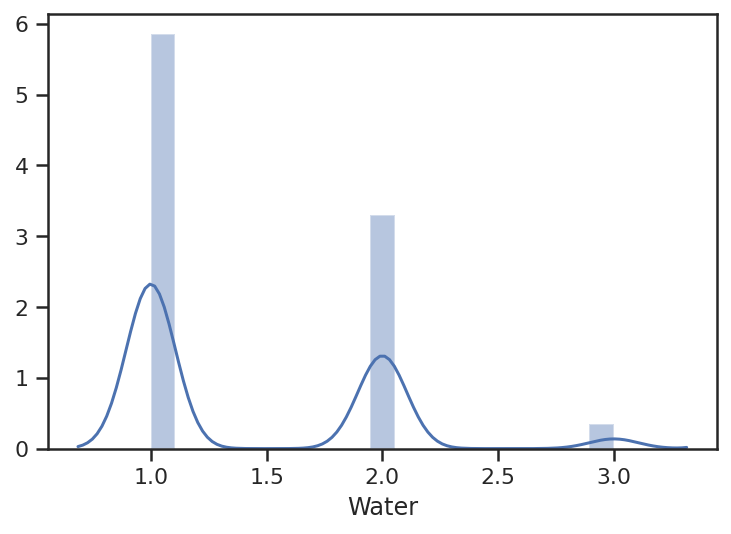

In [60]:
sns.distplot(df["Water"]);

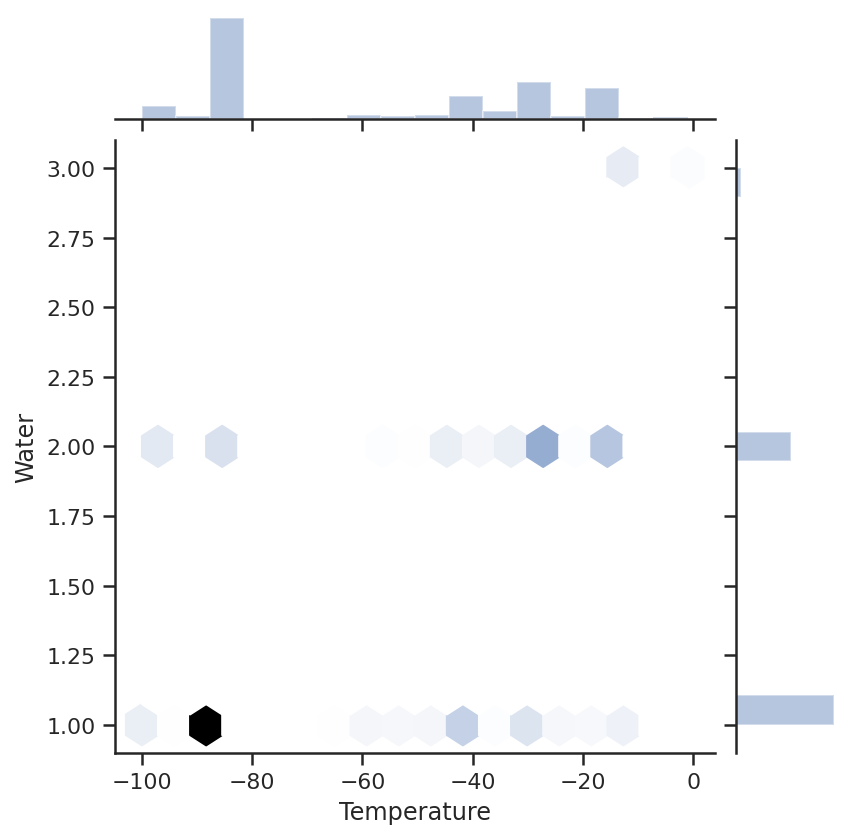

In [61]:
sns.jointplot(x="Temperature",y="Water",data=df, kind="hex");

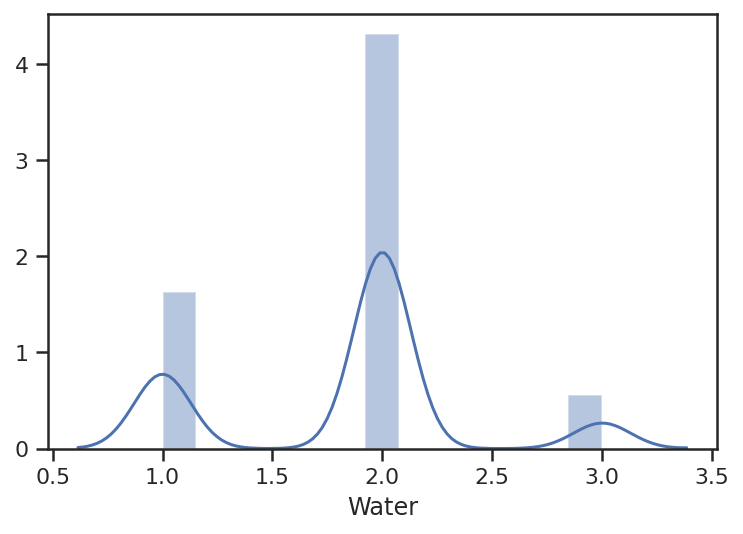

In [71]:
dfd = df[(df["Temperature"] >= -40) & (df["Temperature"] <=-5)]
sns.distplot(dfd["Water"]);

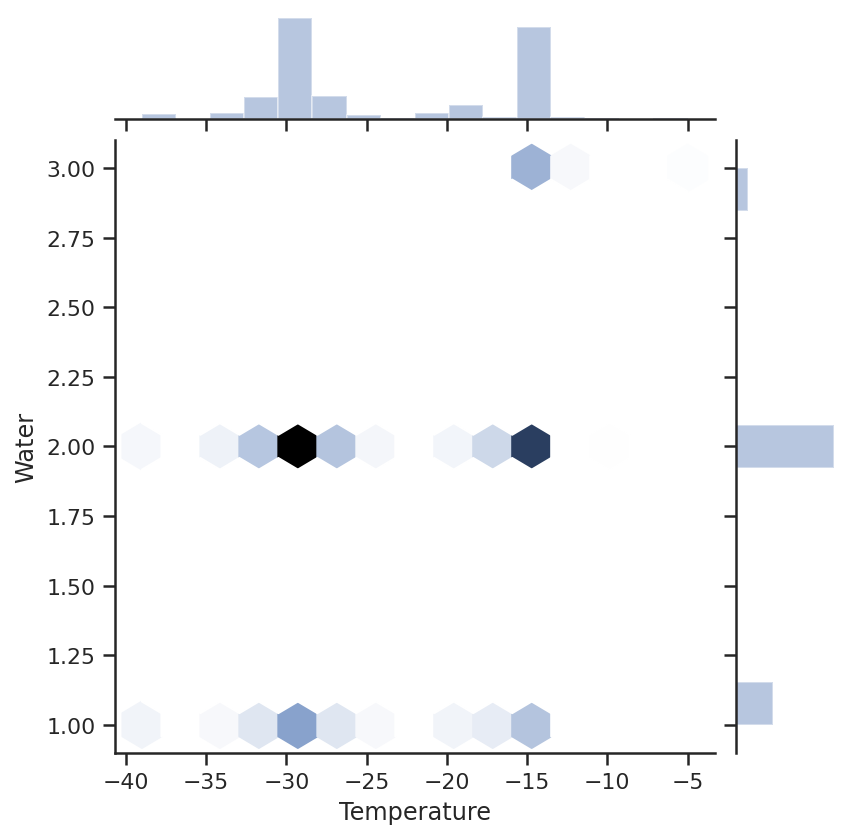

In [72]:
sns.jointplot(x="Temperature", y="Water", data=dfd, kind="hex")

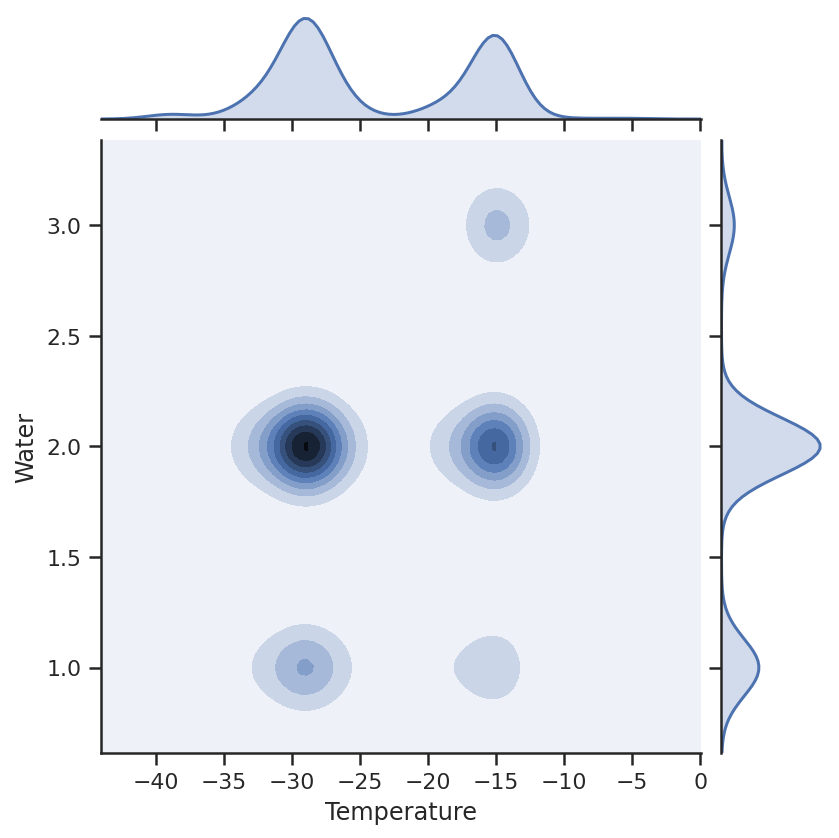

In [73]:
sns.jointplot(x="Temperature", y="Water", data=dfd, kind="kde");

In [75]:
df.dtypes

Latitude °                int64
Latitude                 object
Longitude °               int64
Longitude                object
Topography               object
Difficulty Challenge      int64
Altitude                  int64
Temperature               int64
Metals                    int64
Rare Metals               int64
Concrete                  int64
Water                     int64
Dust Devils               int64
Dust Storms               int64
Meteors                   int64
Cold Waves                int64
Map Name                 object
Named Location           object
Breakthrough 1           object
Breakthrough 2           object
Breakthrough 3           object
Breakthrough 4           object
Breakthrough 5           object
Breakthrough 6           object
Breakthrough 7           object
Breakthrough 8           object
Breakthrough 9           object
Breakthrough 10          object
Breakthrough 11          object
Breakthrough 12          object
Breakthrough 13          object
Breakthr

In [0]:
 X = df.drop(["Difficulty Challenge","Dust Devils","Latitude","Longitude","Topography","Map Name",
              "Named Location","Breakthrough 1","Meteors","Cold Waves","Concrete","Tempreature(F)","Temperature",
              "Breakthrough 2","Breakthrough 3","Breakthrough 4","Breakthrough 5","Breakthrough 6",
              "Breakthrough 7","Breakthrough 8","Breakthrough 9","Breakthrough 10","Breakthrough 11",
              "Breakthrough 12","Breakthrough 13","Breakthrough 14","Breakthrough 15","Breakthrough 16",
              "Breakthrough 17","Dust Storms","Altitude"               
              ],axis=1)
 
y = df["Tempreature(F)"]

In [77]:
print(X.head(), "\n")
print(y.head())

   Latitude °  Longitude °  Metals  Rare Metals  Water
0          62          149       2            2      1
1          62          149       1            1      1
2          62          150       2            2      2
3          62          150       2            2      2
4          62          150       2            2      1 

0   -122.8
1   -122.8
2      5.0
3    -20.2
4   -122.8
Name: Tempreature(F), dtype: float64


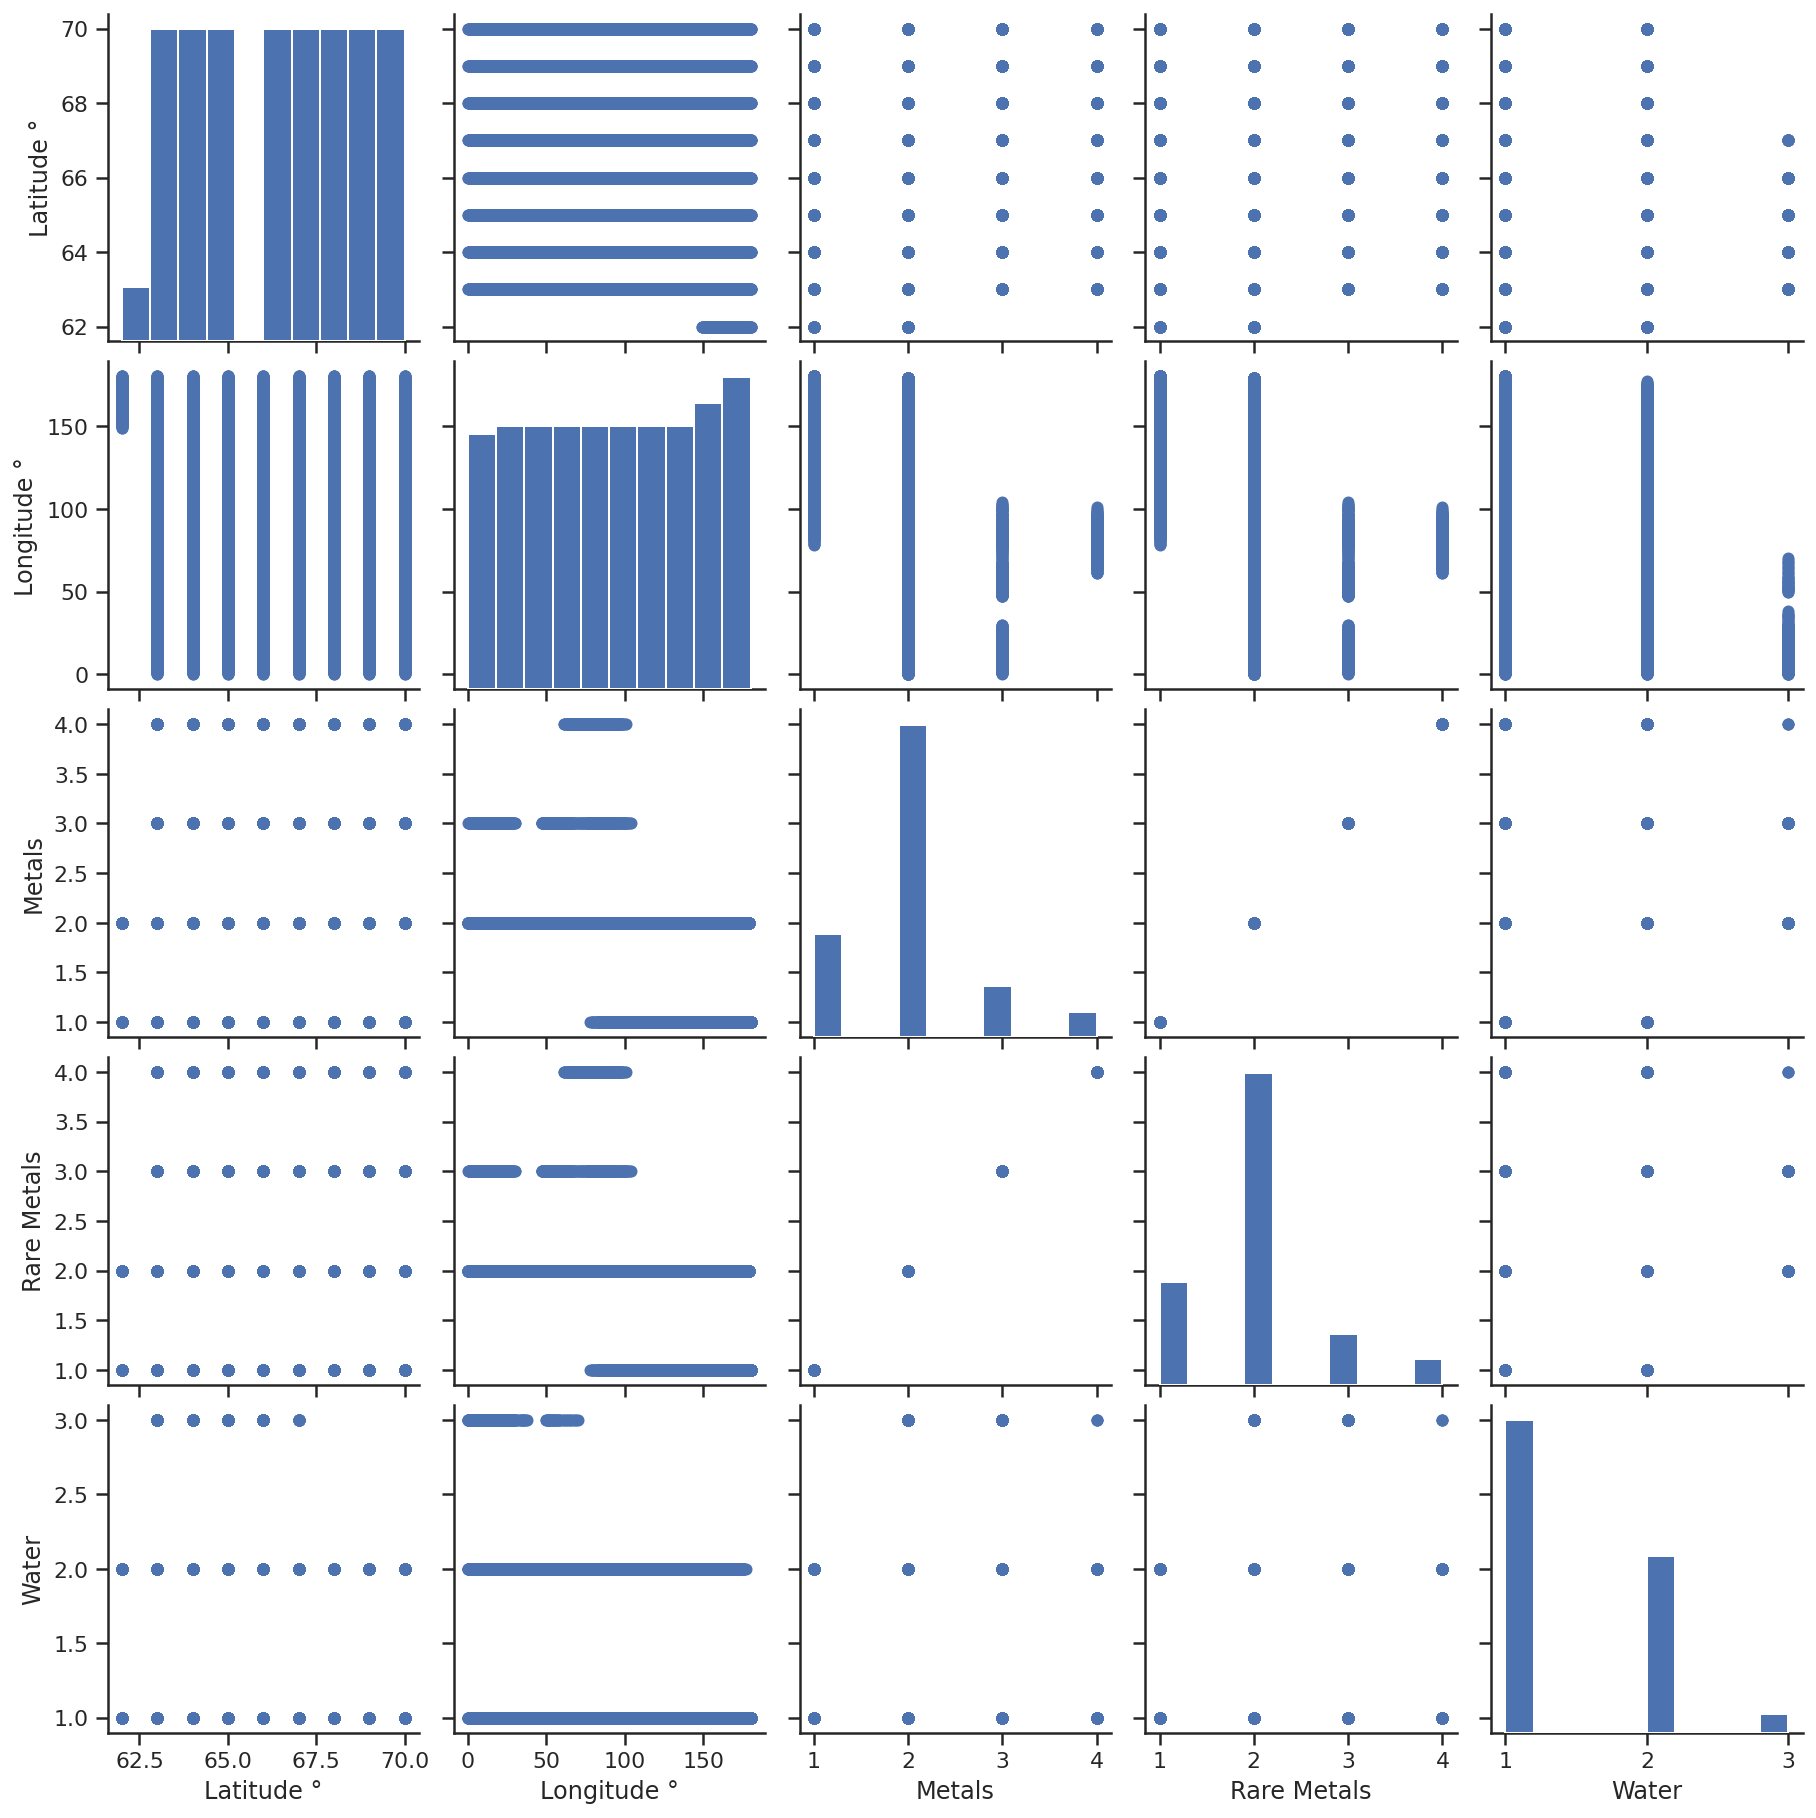

In [79]:
sns.pairplot(X, plot_kws=dict(linewidth=0));

In [78]:
 print(X.shape)
print(y.shape)

(5902, 5)
(5902,)


In [80]:
X.corr()

,Latitude °,Longitude °,Metals,Rare Metals,Water
Latitude °,1.000000,-0.056384,-0.072103,-0.072103,-0.248974
Longitude °,-0.056384,1.000000,-0.415271,-0.415271,-0.376375
Metals,-0.072103,-0.415271,1.000000,1.000000,0.216145
Rare Metals,-0.072103,-0.415271,1.000000,1.000000,0.216145
Water,-0.248974,-0.376375,0.216145,0.216145,1.000000


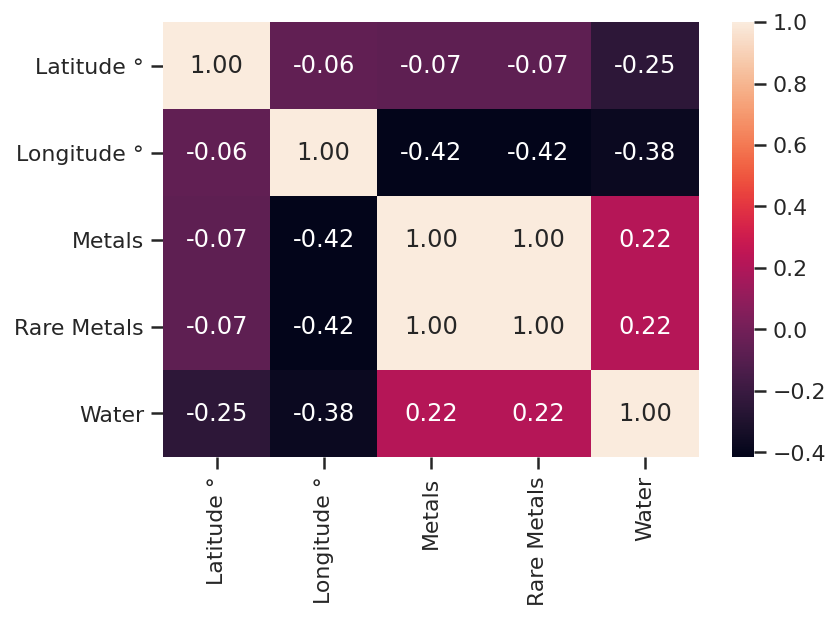

In [81]:
sns.heatmap(X.corr(), annot=True, fmt=".2f");

**2.3. Подготовка данных для обучения моделей**

In [82]:
X.head()

,Latitude °,Longitude °,Metals,Rare Metals,Water
0,62,149,2,2,1
1,62,149,1,1,1
2,62,150,2,2,2
3,62,150,2,2,2
4,62,150,2,2,1


Предобработаем данные, чтобы методы работали лучше:

In [83]:
from sklearn.preprocessing import StandardScaler
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Latitude °,Longitude °,Metals,Rare Metals,Water
count,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03
mean,-2.600119e-14,1.191110e-16,-5.149012e-15,-5.149012e-15,1.096555e-14
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.867515e+00,-1.743466e+00,-1.384657e+00,-1.384657e+00,-7.478585e-01
25%,-1.019402e+00,-8.702114e-01,1.879412e-03,1.879412e-03,-7.478585e-01
50%,-1.712894e-01,3.042810e-03,1.879412e-03,1.879412e-03,-7.478585e-01
75%,6.768232e-01,8.762971e-01,1.879412e-03,1.879412e-03,1.030490e+00
max,1.524936e+00,1.673616e+00,2.774952e+00,2.774952e+00,2.808839e+00


**2.4. Выбор метрик**

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
def test_model(model):
  print("mean_absolute_error:",
  mean_absolute_error(y_test, model.predict(X_test)))
  print("median_absolute_error:",
  median_absolute_error(y_test, model.predict(X_test)))
  print("r2_score:",
  r2_score(y_test, model.predict(X_test)))

**2.5. Выбор моделей**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**2.6. Формирование обучающей и тестовой выборок**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=346705925)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4426, 5)
(1476, 5)
(4426,)
(1476,)


**2.8. Метод k ближайших соседей**

In [91]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [92]:
test_model(knn_5)

mean_absolute_error: 21.908780487804883
median_absolute_error: 5.039999999999999
r2_score: 0.5413605839654179


**2.9. Дерево решений**

In [93]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
test_model(dt_none)

mean_absolute_error: 29.697764227642296
median_absolute_error: 1.1368683772161603e-13
r2_score: 0.042859151381102634


2.9.1. Случайный лес
Попробуем случайный лес с гиперпараметром n = 100:

In [99]:
ran_100 = RandomForestRegressor(n_estimators=500)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
test_model(ran_100)

mean_absolute_error: 26.022747250026647
median_absolute_error: 3.450702857142903
r2_score: 0.3146015633568776


**2.10. Подбор гиперпараметров**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

2.10.1. Метод k ближайших соседей

In [102]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [103]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

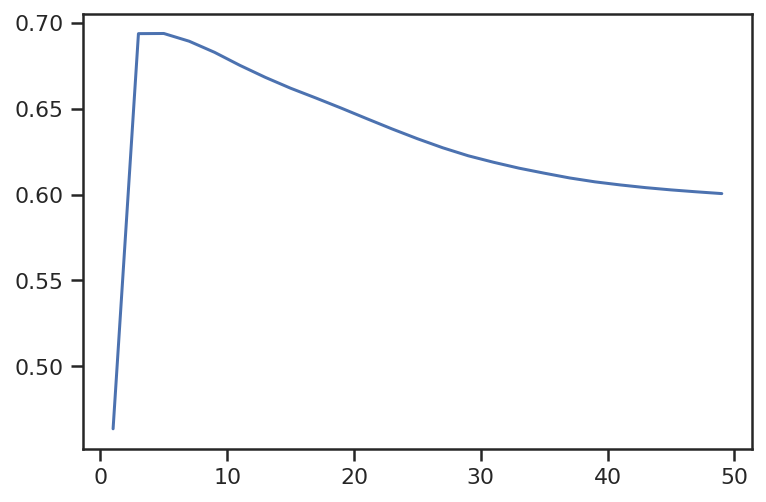

In [104]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

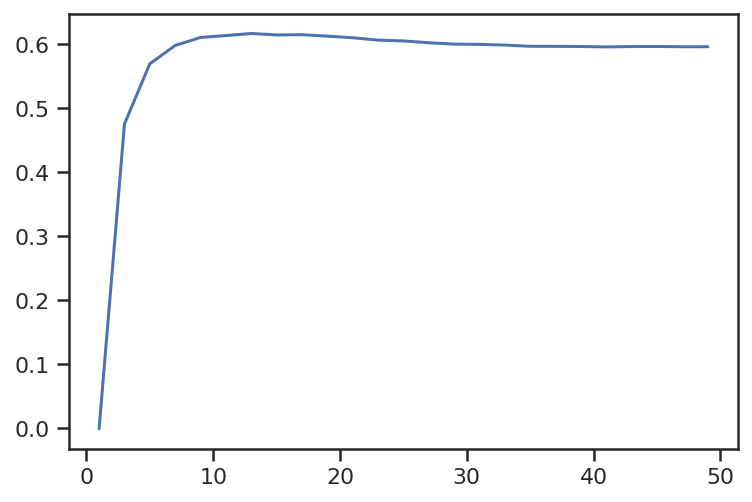

In [105]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Видно, что наилучший результат достигается при k = 7.

In [106]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 22.25900562851783
median_absolute_error: 9.83076923076925
r2_score: 0.5946143448068464


In [107]:
test_model(knn_5)

mean_absolute_error: 21.908780487804883
median_absolute_error: 5.039999999999999
r2_score: 0.5413605839654179


2.10.2. Дерево решений

In [108]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [109]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

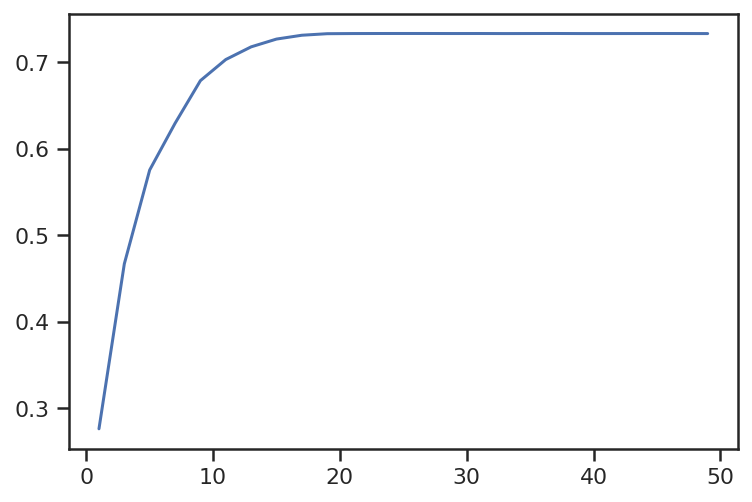

In [110]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

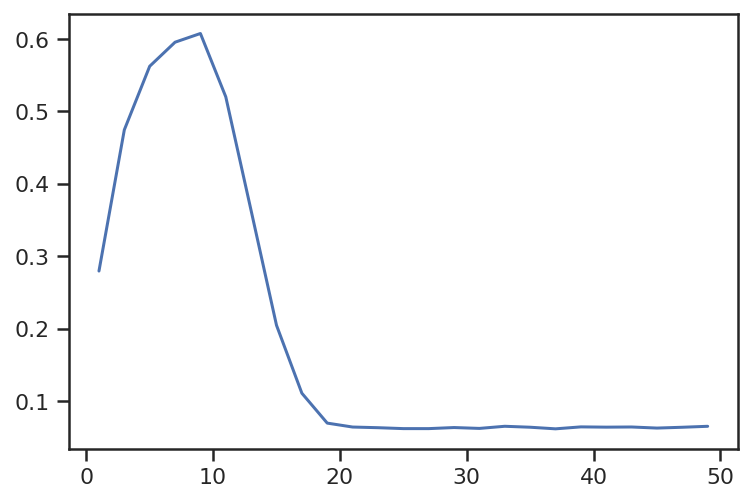

In [111]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [112]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 20.697022908154086
median_absolute_error: 5.178529411764696
r2_score: 0.6068241119779583


In [113]:
test_model(dt_none)

mean_absolute_error: 29.697764227642296
median_absolute_error: 1.1368683772161603e-13
r2_score: 0.042859151381102634


In [114]:
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

In [115]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

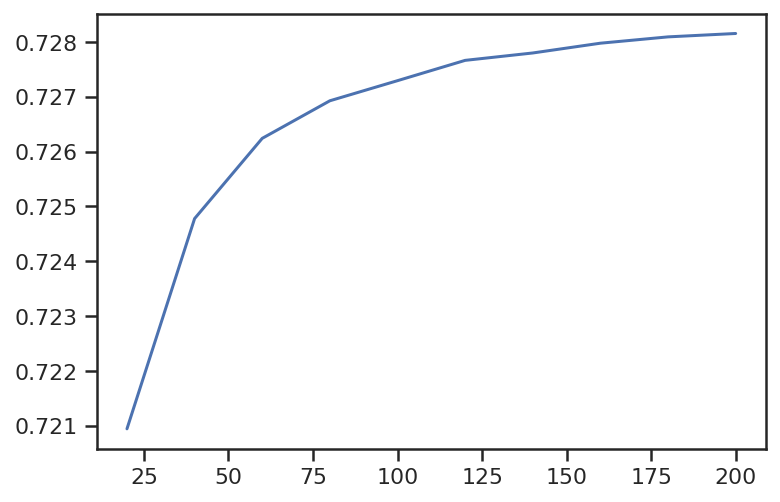

In [116]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

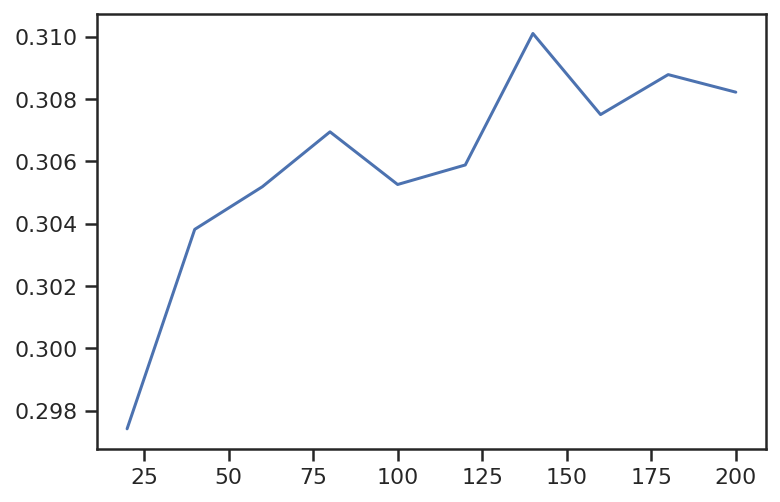

In [117]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [118]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 25.955990380095198
median_absolute_error: 3.5805000000000433
r2_score: 0.3158253844926814


In [119]:
test_model(ran_100)

mean_absolute_error: 26.022747250026647
median_absolute_error: 3.450702857142903
r2_score: 0.3146015633568776
